In [5]:
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from keras import backend as K
import tensorflow as tf

In [8]:
from helper import generate_gaussians_distributions, plot_boundaries, plot_boundaries_keras

In [9]:
X, y = generate_gaussians_distributions(sep=0.5, N = 500, normalize=False, random_state=41)

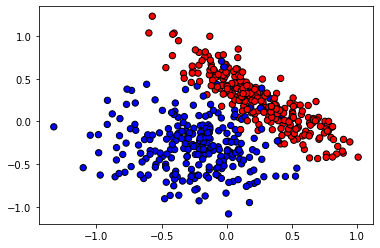

In [10]:
plot_boundaries(X,y)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [12]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

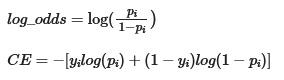

In [14]:
model.compile(Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X, y, epochs=10, verbose=1, batch_size=100)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.8940
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.5402 - accuracy: 0.9000
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.5309 - accuracy: 0.9100
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.9120
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.9160
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.9200
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.9220
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.9240
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.9240
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.9260


In [21]:
i = 7 # Try with different numbers, predict 
print(X[i:i+1][0])
p = model.predict(X[i:i+1])[0][0]
print(f'Prob: {p}')
print(f'Log odds: {np.log(p/(1-p))}')
print(f'Cross entropy: {-y[i]*np.log(p) - (1-y[i])*np.log(1-p)}')

[0.11342151 0.44352227]
Prob: 0.37323424220085144
Log odds: -0.5183666610892504
Cross entropy: 0.46718240017897966


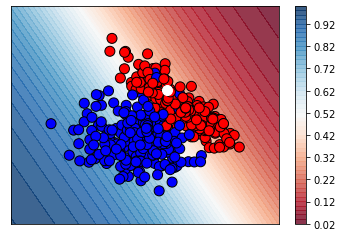

In [22]:
f, ax = plt.subplots(1, 1)
plot_boundaries_keras(X, y, None, model.predict, ax=ax)
ax.scatter(X[i][0], X[i][1], s=100, color='w')

In [23]:
model.get_weights()

[array([[-1.4534794],
        [-0.8241694]], dtype=float32),
 array([0.01202656], dtype=float32)]

In [24]:
model.predict(np.array([[0.5, 1]]))

array([[0.17669776]], dtype=float32)

In [25]:
# End